In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the random module.
import random

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
from citipy import citipy

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

le port re
albany au
khatanga ru
barentsburg sj
manzhouli cn
hermanus za
longyearbyen sj
busselton au
nizhneyansk ru
guasdualito ve
chokurdakh ru
esperance au
port elizabeth za
saldanha za
khatanga ru
cape town za
upernavik gl
coquimbo cl
punta arenas cl
kapaa us
saint-philippe re
port alfred za
praia da vitoria pt
punta arenas cl
rikitea pf
cherskiy ru
atuona pf
yar-sale ru
punta arenas cl
cayenne gf
saskylakh ru
tura ru
zhaoyang cn
noumea nc
tuktoyaktuk ca
dharchula in
nanortalik gl
hobart au
hobart au
dranceni sat ro
balkanabat tm
narsaq gl
la ronge ca
castro cl
lethem gy
mananjary mg
pisco pe
ponta delgada pt
grand river south east mu
puerto ayora ec
new norfolk au
pathein mm
mathathane bw
paamiut gl
mataura pf
pucallpa pe
taolanaro mg
nizhneyansk ru
xai-xai mz
cape town za
beatrice us
puerto ayora ec
rikitea pf
popondetta pg
georgetown sh
santa cruz cl
ribeira grande pt
nouadhibou mr
mataura pf
mackay au
puerto ayora ec
hermanus za
norman wells ca
albany au
oranjestad aw
mantua cu

punta arenas cl
airai pw
atuona pf
hermanus za
busselton au
tucuman ar
bethel us
mehamn no
kaitangata nz
hasaki jp
albany au
port alfred za
guerrero negro mx
pangnirtung ca
pangai to
geraldton au
hovd mn
tsihombe mg
haines junction ca
lasa cn
hobart au
coruripe br
mataura pf
port hawkesbury ca
chuy uy
carnarvon au
upernavik gl
jamestown sh
egvekinot ru
vestmanna fo
ancud cl
boralday kz
bluff nz
busselton au
barrow us
puerto ayora ec
port alfred za
jamestown sh
grand centre ca
mar del plata ar
ha tinh vn
bethel us
busselton au
cape town za
hermanus za
busselton au
coahuayana mx
illoqqortoormiut gl
punta arenas cl
busselton au
punta arenas cl
bluff nz
ayer itam my
beringovskiy ru
ushuaia ar
leshukonskoye ru
wagar sd
kapaa us
busselton au
busselton au
kutum sd
illoqqortoormiut gl
qaanaaq gl
ijaki ki
lavrentiya ru
albany au
bangassou cf
port alfred za
ushuaia ar
marawi sd
lubao cd
busselton au
vila velha br
ushuaia ar
vaini to
airai pw
khatanga ru
harper lr
kaitangata nz
nome us
busselton 

mahebourg mu
punta arenas cl
cape town za
batemans bay au
punta arenas cl
nizhneyansk ru
bredasdorp za
ribeira grande pt
torbay ca
leningradskiy ru
pokrov ru
bredasdorp za
ostrovnoy ru
yulara au
cape town za
haines junction ca
taolanaro mg
san patricio mx
ngaoundere cm
arcata us
rudbar af
khoy ir
punta arenas cl
asau tv
mahebourg mu
sorong id
ushuaia ar
kloulklubed pw
rikitea pf
saint anthony ca
leningradskiy ru
san joaquin bo
iqaluit ca
oga jp
honiara sb
nuuk gl
bluff nz
rikitea pf
punta arenas cl
los llanos de aridane es
klaksvik fo
albany au
busselton au
luderitz na
alice springs au
soeng sang th
fukue jp
sao joao da barra br
busselton au
comodoro rivadavia ar
punta arenas cl
gua musang my
qaanaaq gl
albany au
miandrivazo mg
sitka us
kodiak us
atuona pf
klaksvik fo
mar del plata ar
alekseyevka kz
khatanga ru
gushikawa jp
sioux lookout ca
carndonagh ie
mersing my
port alfred za
nara ml
burica pa
avon park us
petukhovo ru
upernavik gl
mto wa mbu tz
korla cn
sibu my
pevek ru
winnemucca

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [9]:
import requests
from config import weather_api_key

In [57]:
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

In [58]:
import time
from datetime import datetime

In [59]:
#create empty list for weather data
city_data = []
#Beggining of loging
print("Beggining of data retrieval      ")
print("---------------------------------")

#create counters.
record_count = 1
set_count = 1


Beggining of data retrieval      
---------------------------------


In [60]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | le port
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | manzhouli
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | guasdualito
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | praia da vitoria
Processing

Processing Record 40 of Set 4 | kewanee
Processing Record 41 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 42 of Set 4 | santa maria
Processing Record 43 of Set 4 | yarim
Processing Record 44 of Set 4 | hami
Processing Record 45 of Set 4 | chumikan
Processing Record 46 of Set 4 | bac lieu
Processing Record 47 of Set 4 | vaitape
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | ahipara
Processing Record 50 of Set 4 | san quintin
Processing Record 1 of Set 5 | bredasdorp
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | karaul
City not found. Skipping...
Processing Record 5 of Set 5 | kijang
Processing Record 6 of Set 5 | kaeo
Processing Record 7 of Set 5 | pinawa
Processing Record 8 of Set 5 | paradwip
City not found. Skipping...
Processing Record 9 of Set 5 | lasa
Processing Record 10 of Set 5 | sechura
Processing Record 11 of Set 5 | broome
Processing Record 12 of Set 5 | quatre coc

Processing Record 28 of Set 8 | ambovombe
Processing Record 29 of Set 8 | cerrito
Processing Record 30 of Set 8 | muli
Processing Record 31 of Set 8 | banda aceh
Processing Record 32 of Set 8 | port macquarie
Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | verkhnyaya khava
Processing Record 35 of Set 8 | evensk
Processing Record 36 of Set 8 | susanville
Processing Record 37 of Set 8 | cockburn town
Processing Record 38 of Set 8 | nerchinskiy zavod
Processing Record 39 of Set 8 | sobolevo
Processing Record 40 of Set 8 | muscat
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | hachinohe
Processing Record 43 of Set 8 | bandarbeyla
Processing Record 44 of Set 8 | poum
Processing Record 45 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 46 of Set 8 | mogochin
City not found. Skipping...
Processing Record 47 of Set 8 | darfield
Processing Record 48 of Set 8 | melo
Processing Record 49 of Set 8 | sal rei
Processing Record 50 of Se

Processing Record 20 of Set 12 | ulaanbaatar
Processing Record 21 of Set 12 | lianzhou
Processing Record 22 of Set 12 | zuya
Processing Record 23 of Set 12 | riyadh
Processing Record 24 of Set 12 | skibbereen
Processing Record 25 of Set 12 | kautokeino
Processing Record 26 of Set 12 | lujan
Processing Record 27 of Set 12 | batemans bay
Processing Record 28 of Set 12 | pokrov
Processing Record 29 of Set 12 | ostrovnoy
Processing Record 30 of Set 12 | ngaoundere
Processing Record 31 of Set 12 | arcata
Processing Record 32 of Set 12 | rudbar
Processing Record 33 of Set 12 | khoy
Processing Record 34 of Set 12 | kloulklubed
Processing Record 35 of Set 12 | saint anthony
Processing Record 36 of Set 12 | san joaquin
Processing Record 37 of Set 12 | oga
Processing Record 38 of Set 12 | honiara
Processing Record 39 of Set 12 | los llanos de aridane
Processing Record 40 of Set 12 | soeng sang
Processing Record 41 of Set 12 | fukue
Processing Record 42 of Set 12 | comodoro rivadavia
Processing R

In [62]:
city_data_df= pd.DataFrame(city_data)

In [63]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Le Port,-20.9373,55.2919,21.25,60,69,3.26,RE,2022-08-04 18:07:02
1,Albany,42.6001,-73.9662,36.46,46,7,3.78,US,2022-08-04 18:05:32
2,Khatanga,71.9667,102.5000,12.16,70,96,2.46,RU,2022-08-04 18:07:03
3,Manzhouli,49.6000,117.4333,16.50,73,21,9.36,CN,2022-08-04 18:07:03
4,Hermanus,-34.4187,19.2345,10.45,79,62,3.87,ZA,2022-08-04 18:07:04


In [64]:
new_order= ["City","Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_order]

In [65]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Le Port,RE,2022-08-04 18:07:02,-20.9373,55.2919,21.25,60,69,3.26
1,Albany,US,2022-08-04 18:05:32,42.6001,-73.9662,36.46,46,7,3.78
2,Khatanga,RU,2022-08-04 18:07:03,71.9667,102.5000,12.16,70,96,2.46
3,Manzhouli,CN,2022-08-04 18:07:03,49.6000,117.4333,16.50,73,21,9.36
4,Hermanus,ZA,2022-08-04 18:07:04,-34.4187,19.2345,10.45,79,62,3.87
...,...,...,...,...,...,...,...,...,...
561,Avon Park,US,2022-08-04 18:24:07,27.5959,-81.5062,34.33,68,9,4.12
562,Petukhovo,RU,2022-08-04 18:24:08,55.0692,67.9019,16.67,79,5,2.83
563,Mto Wa Mbu,TZ,2022-08-04 18:24:08,-3.3500,35.8500,19.20,69,54,1.30
564,Sibu,MY,2022-08-04 18:24:09,2.3000,111.8167,24.17,100,40,1.03


In [66]:
#create output
output_data_file= "weather_data/cities.csv"
#export the city _data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [67]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [68]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1659637509.2947454

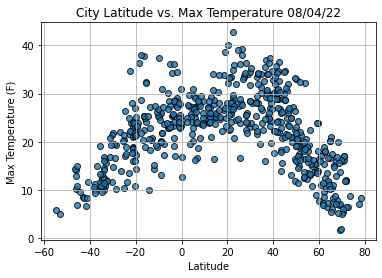

In [69]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

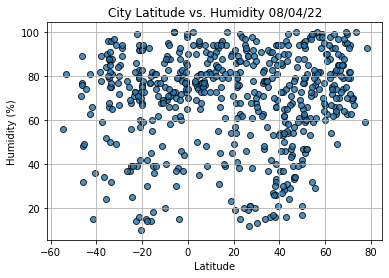

In [70]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

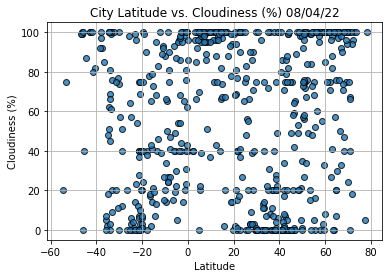

In [71]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

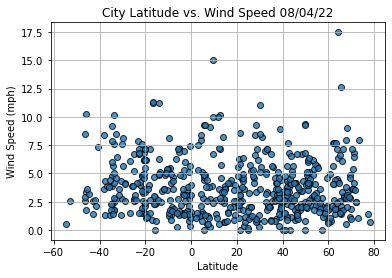

In [72]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [73]:
#linear regression
from scipy.stats import linregress

In [74]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [75]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [76]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

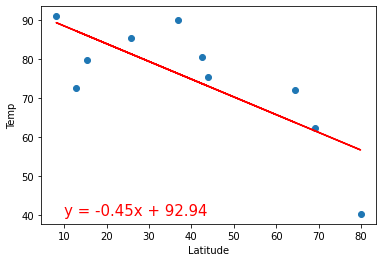

In [77]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [78]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [79]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Albany,US,2022-08-04 18:05:32,42.6001,-73.9662,36.46,46,7,3.78
2,Khatanga,RU,2022-08-04 18:07:03,71.9667,102.5000,12.16,70,96,2.46
3,Manzhouli,CN,2022-08-04 18:07:03,49.6000,117.4333,16.50,73,21,9.36
5,Longyearbyen,SJ,2022-08-04 18:07:05,78.2186,15.6401,8.28,93,100,0.67
7,Guasdualito,VE,2022-08-04 18:07:06,7.2424,-70.7324,27.52,76,99,1.25
...,...,...,...,...,...,...,...,...,...
560,Nara,JP,2022-08-04 18:23:06,34.6851,135.8049,26.94,78,22,0.78
561,Avon Park,US,2022-08-04 18:24:07,27.5959,-81.5062,34.33,68,9,4.12
562,Petukhovo,RU,2022-08-04 18:24:08,55.0692,67.9019,16.67,79,5,2.83
564,Sibu,MY,2022-08-04 18:24:09,2.3000,111.8167,24.17,100,40,1.03


In [80]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Le Port,RE,2022-08-04 18:07:02,-20.9373,55.2919,21.25,60,69,3.26
4,Hermanus,ZA,2022-08-04 18:07:04,-34.4187,19.2345,10.45,79,62,3.87
6,Busselton,AU,2022-08-04 18:07:05,-33.6500,115.3333,10.87,75,99,2.51
9,Esperance,AU,2022-08-04 18:07:07,-33.8667,121.9000,9.91,75,81,10.15
10,Port Elizabeth,ZA,2022-08-04 18:07:08,-33.9180,25.5701,14.62,87,69,1.79
...,...,...,...,...,...,...,...,...,...
537,Batemans Bay,AU,2022-08-04 18:22:55,-35.7167,150.1833,13.39,52,7,3.81
548,Honiara,SB,2022-08-04 18:23:00,-9.4333,159.9500,24.48,88,34,2.62
552,Comodoro Rivadavia,AR,2022-08-04 18:23:02,-45.8667,-67.5000,10.92,32,0,10.29
554,Miandrivazo,MG,2022-08-04 18:23:04,-19.5167,45.4667,23.24,59,24,1.17


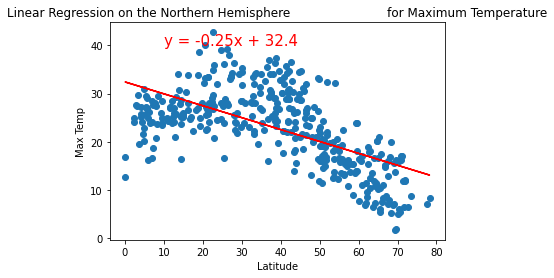

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

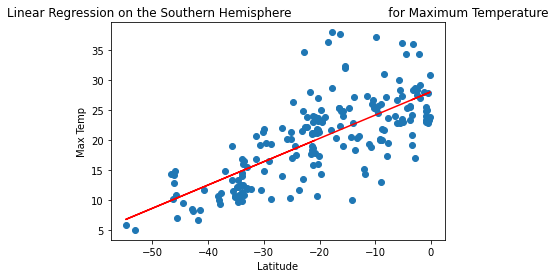

In [82]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

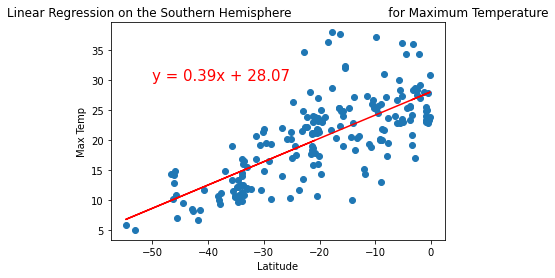

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,30))

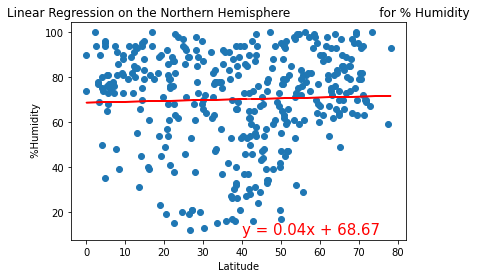

In [85]:
# Linear regression humidity northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere \
                      for % Humidity",' %Humidity', (40,10))

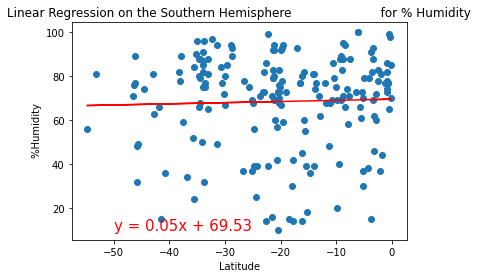

In [89]:
# Linear regression humidity northern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Southern Hemisphere \
                      for % Humidity",' %Humidity', (-50,10))

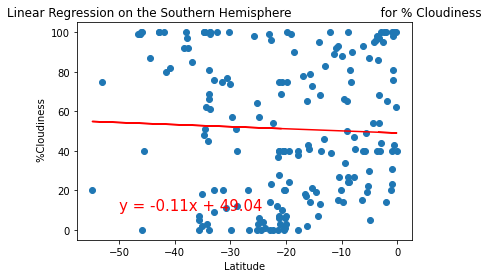

In [91]:
# Linear regression humidity northern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Southern Hemisphere \
                      for % Cloudiness",' %Cloudiness', (-50,10))

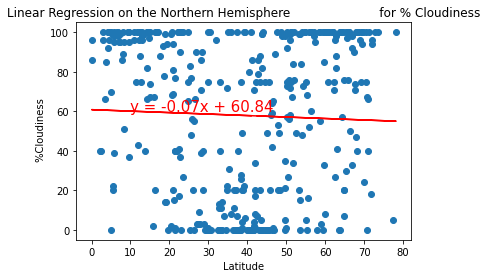

In [96]:
# Linear regression humidity northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere \
                      for % Cloudiness",' %Cloudiness', (10,60))

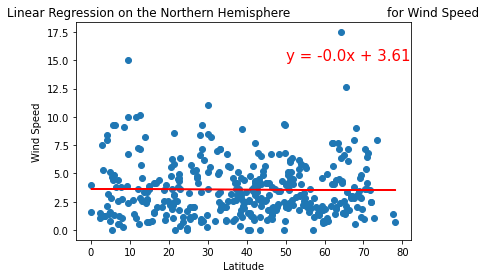

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(50,15))